In [1]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
m33 = SkyCoord(266.41, -29.01, unit="deg")
bear_mountain = EarthLocation(lat=4.711*u.deg, lon=-72.07*u.deg, height=2600*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2012-7-12 23:00:00') - utcoffset
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))  
"M33's Altitude = {0.alt:.2}".format(m33altaz)  

"M33's Altitude = 5.6e+01 deg"

In [280]:
import astropy.coordinates

In [305]:
astropy.coordinates.get_sun(time.now()).transform_to(AltAz(obstime=time.now(),location=bear_mountain))

<SkyCoord (AltAz: obstime=2016-10-28 16:55:02.355274, location=(1957748.629049989, -6050472.961243703, 520553.9533501107) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, m)
    (194.37256341, 70.93852792, 148600913362.75524902)>

In [306]:
astropy.coordinates.get_sun(time.now()-1*u.hour).transform_to(AltAz(obstime=time.now(),location=bear_mountain)).alt,astropy.coordinates.get_sun(time.now()).transform_to(AltAz(obstime=time.now(),location=bear_mountain)).az

(<Latitude -3.3033630220677326 deg>, <Longitude 256.3808687761193 deg>)

In [285]:
Time('now')

ValueError: Input values did not match any of the formats where the format keyword is optional [u'datetime', u'iso', u'isot', u'yday', u'fits', u'byear_str', u'jyear_str']

In [42]:
m33

<SkyCoord (ICRS): (ra, dec) in deg
    (266.41, -29.01)>

In [43]:
for i in range(24):
    bear_mountain = EarthLocation(lat=4.711*u.deg, lon=-72.07*u.deg, height=2600*u.m)
    utcoffset = -5*u.hour  # Eastern Daylight Time
    for j in ['00','15','30','45']:
        time = Time('2016-10-26 %i:%s:00' % (i,j)) - utcoffset
        m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))  
        print time, " Sgr A altitude = {0.alt:.1f}".format(m33altaz)," Sgr A azimuth = {0.az:.1f}".format(m33altaz)  

2016-10-26 05:00:00.000  Sgr A altitude = -37.9 deg  Sgr A azimuth = 236.4 deg
2016-10-26 05:15:00.000  Sgr A altitude = -41.0 deg  Sgr A azimuth = 235.0 deg
2016-10-26 05:30:00.000  Sgr A altitude = -44.1 deg  Sgr A azimuth = 233.3 deg
2016-10-26 05:45:00.000  Sgr A altitude = -47.0 deg  Sgr A azimuth = 231.3 deg
2016-10-26 06:00:00.000  Sgr A altitude = -49.9 deg  Sgr A azimuth = 228.9 deg
2016-10-26 06:15:00.000  Sgr A altitude = -52.7 deg  Sgr A azimuth = 226.0 deg
2016-10-26 06:30:00.000  Sgr A altitude = -55.3 deg  Sgr A azimuth = 222.6 deg
2016-10-26 06:45:00.000  Sgr A altitude = -57.7 deg  Sgr A azimuth = 218.7 deg
2016-10-26 07:00:00.000  Sgr A altitude = -60.0 deg  Sgr A azimuth = 214.0 deg
2016-10-26 07:15:00.000  Sgr A altitude = -61.9 deg  Sgr A azimuth = 208.5 deg
2016-10-26 07:30:00.000  Sgr A altitude = -63.5 deg  Sgr A azimuth = 202.2 deg
2016-10-26 07:45:00.000  Sgr A altitude = -64.7 deg  Sgr A azimuth = 195.2 deg
2016-10-26 08:00:00.000  Sgr A altitude = -65.5 deg 

In [26]:
m33altaz.alt

<Latitude 32.15153471037102 deg>

In [12]:
m33altaz.az

<Longitude 27.637790797274945 deg>

In [44]:
import serial

In [48]:
from time import sleep


In [47]:
ls dev/tty.* 

ls: cannot access dev/tty.*: No such file or directory


In [ ]:
import serial
ser = serial.Serial('/dev/tty.usbmodem1d11', 9600) # Establish the connection on a specific port
counter = 32 # Below 32 everything in ASCII is gibberish
while True:
     counter +=1
     ser.write(str(chr(counter))) # Convert the decimal number to ASCII then send it to the Arduino
     print ser.readline() # Read the newest output from the Arduino
     sleep(.1) # Delay for one tenth of a second
     if counter == 255:
     counter = 32

In [208]:
ser = serial.Serial('/dev/ttyACM0', 9600) # Establish the connection on a specific port


In [90]:
ser.write(str(chr(counter))) # Convert the decimal number to ASCII then send it to the Arduino
print str(chr(counter))


In [91]:
print str(chr(counter))

In [ ]:
def a2s(arr):
    """ Array of integer byte values --> binary string
    """
    return ''.join(chr(b) for b in arr)

In [309]:
ser = serial.Serial('/dev/ttyACM0', 9600) # Establish the connection on a specific port
azbin=bin(2700)
azpadn=16-len(azbin[2:])
azbin='0b'+azpadn*'0'+azbin[2:]
altbin=bin(450)
altpadn=16-len(altbin[2:])
altbin='0b'+altpadn*'0'+altbin[2:]
ser.write(a2s([int(azbin[2:-8],2),int(azbin[-8:],2),int(altbin[2:-8],2),int(altbin[-8:],2)]))
ser.close()

In [229]:
mybin=bin(3600)
int(mybin[2:-8],2)

14

In [241]:
mybin=bin(3600)
padn=16-len(mybin[2:])
mybin='0b'+padn*'0'+mybin[2:]
mybin

'0b0000111000010000'

In [238]:
len(padn*'0')

15

In [108]:
ser.close()

In [119]:
ser.readline()

OSError: [Errno 11] Resource temporarily unavailable

In [120]:
def a2s(arr):
    """ Array of integer byte values --> binary string
    """
    return ''.join(chr(b) for b in arr)

In [133]:
a2s([11,12,13,14])

'\x0b\x0c\r\x0e'

In [206]:
a2s([int(mybin[-8:],2),int(mybin[2:-8],2)])

'\x10\x0e'

In [207]:
a2s([int(mybin[-8:],2)])

'\x10'

In [150]:
import binascii

In [164]:
bin(3600)

'0b111000010000'

In [168]:
hex(3600)

'0xe10'

In [180]:
mybin=bin(3600)
int(mybin[-8:],2)

16

In [193]:
int(mybin[2:-8],2)

14

In [187]:
mybin[-8:]

'00010000'

In [189]:
mybin[2:-8]

'1110'

In [190]:
binascii.unhexlify('%x' % int(mybin[-8:],2))

'\x10'

In [194]:
binascii.unhexlify('%x' % int(mybin[2:-8],2))

TypeError: Odd-length string

In [199]:
'%x' % 16

'10'

In [197]:
int(mybin[2:-8],2)

14

In [198]:
binascii.unhexlify('e')

TypeError: Odd-length string

In [ ]:
>>> n = int('0b110100001100101011011000110110001101111', 2)
>>> binascii.unhexlify('%x' % n)
'hello'

In [154]:
bin(3600)

'0b111000010000'

In [147]:
hex(010000)

TypeError: hex() argument can't be converted to hex

In [162]:
n=int(bin(32), 2)

In [163]:
binascii.unhexlify('%x' %n)

' '

In [155]:
int(bin(3600), 2)

3600

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

In [93]:
eloff=4.*np.pi/180

In [94]:
el=np.linspace(0,np.pi/2,10000)

In [95]:
omega=np.arcsin(np.sin(el)/np.cos(eloff))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in arcsin
  if __name__ == '__main__':


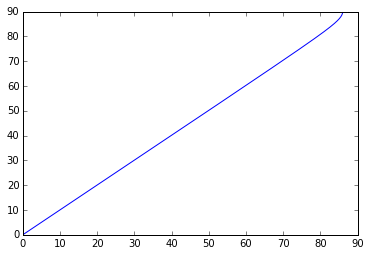

In [96]:
plt.plot(el*180/np.pi,omega*180/np.pi)

In [97]:
elmax=np.max(el[np.isfinite(omega)])*180/np.pi
print np.around(elmax,2) # unsurprisingly, it's 90-phoff

85.99


In [99]:
el=el[np.isfinite(omega)]
omega=omega[np.isfinite(omega)]


In [100]:
azcor=-np.arctan2(np.cos(omega),np.sin(omega)*np.sin(eloff))*180/np.pi

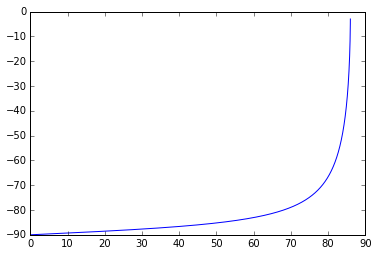

In [106]:
plt.plot(el*180/np.pi,azcor)